In [92]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
x=np.linspace(0, 10, 100)
def g() : 
    #girilen katsayılarla en fazla ikinci dereceden polinom oluştur
    return a*(x**2)+b*x+c
def nokta():
    # g fonksiyonun etrafında rastgele nokta kümesi oluştur
    l=[]
    for i in g():
        l.append(i+np.random.normal(0,1))
    return np.array(l)
def f() :
    # katsayılarını güncelleyen fonksiyon 
    return a1*(x**2)+b1*x+c1

def gradyan():
    # noktalarla f fonksiyonun farkının karesinin a1,b1 ve c1 katsayılarına göre türevlerini eksiyle çarpıp listele
    t=0
    l=[0,0,0]
    #a1
    for i in range(100) :
        t+=-2*x[i]**2*y[i]+2*a1*x[i]**4+2*b1*x[i]**3+2*c1*x[i]**2                                               
    l[0]=-t
    t=0
    #b1
    for i in range(100) :
        t+=-2*x[i]*y[i]+2*a1*x[i]**3+2*b1*x[i]**2+2*c1*x[i]
                                            
    l[1]=-t
    t=0
    #c1
    for i in range(100) :
        t+=-2*y[i]+2*a1*x[i]**2+2*b1*x[i]+2*c1
                                       
    l[2]=-t
    return l
 
def hata() :
    # g,f ve p fonksiyonlarının hatalarını karşılaştır
    t=0
    l=[]
    for i in range(100) :
        t+=(y[i]-g()[i])**2
    l.append(t)
    t=0
    for i in range(100) :
        t+=(y[i]-f()[i])**2
    l.append(t)
    t=0
    for i in range(100) :
        t+=(y[i]-p(x)[i])**2
    l.append(t)
    l.append(l[1]-l[0])
    l.append(l[1]-l[2])
    for i in l :
        print(i)

a : 1
b : 0
c : 0
[406163.59774653893, 50533.780486133466, 6708.5940542114795]
0 0 0

[1.7416827372594526, -7.177406030172307, 1.1932833631217075]
0.987197430146696 0.1283709445979815 -0.177626727198052

[1.0501348775143242, -4.62356235994784, 0.940620771827458]
0.989826805036816 0.09983225407672526 -0.12175844701137163

[0.7130967946912392, -3.1404476564067423, 0.6393329114418731]
0.9915687595588933 0.08065449590619986 -0.08272162592977886

[0.48444777772596126, -2.1334891535095437, 0.4343371726778744]
0.9927520645178317 0.06762642582686637 -0.0561990050596175

[0.32911383989454635, -1.4494045431506208, 0.29507076506960805]
0.9935559528491882 0.05877569351414335 -0.038180623905762254

60.92510850651253
60.58736508147528
60.57836406467377
-0.33774342503724597
0.009001016801512662


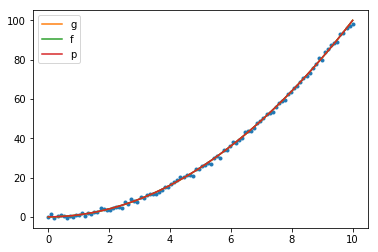

In [94]:
fig,ax=plt.subplots()
# g fonksiyonunun katsayılarını gir
a=float(input("a : "))
b=float(input("b : "))
c=float(input("c : "))
# f fonksiyonunun katsayılarının her birini 0 dan başlat
a1=0
b1=0
c1=0
# nokta() fonksiyonunu tekrar çağırmamak için değerleri y değişkenine ata
y=nokta()
# noktaları çiz
ax.plot(x,y,".")
# g fonksiyonunu çiz
ax.plot(x,g(),"-",label='g')
i=0
while i<3000 :
    # gradyan() fonksiyonunu tekrar çağırmamak için değerleri d değişkenine ata
    d=gradyan()
    # parametreleri takip etmek için belli aralıklara yazdır
    if i%500==0 :        
        print(d)
        print(a1,b1,c1)
        print()
    # f fonksiyonunun katsayılarını hatayı en aza indirecek şekilde güncelle
    a1+=d[0]*0.000004
    b1+=d[1]*0.00001
    c1+=d[2]*0.0001    
    i+=1
# hazır fonksiyon
p=np.polynomial.polynomial.Polynomial.fit(x,y,2)
# f ve p fonksiyonlarının son halini çiz
hata()
ax.plot(x,f(),"-",label='f') 
ax.plot(x,p(x),"-",label='p')
ax.legend()
